In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [67]:
df=pd.read_csv(r'data/DS_DA_BS.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,role
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,DS
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,DS
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE,DS
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,DS
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,DS


In [75]:
print("shape",df.shape)
df['role'].value_counts()
df.groupby('role')['role'].count()

shape (10254, 16)


role
BA    4092
DA    2253
DS    3909
Name: role, dtype: int64

# Reviewing data
* check for null values and duplicates


In [76]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
role                 0
dtype: int64

In [77]:
df.duplicated().sum()

0

# some utility functions

In [78]:
#using re to extract numbers from the string
def extract_numbers(arr):#arr is the array of strings
    min_result=[]
    max_result=[]
#     result=[]
    for i in arr:
        temp=re.findall('[0-9]+',i)
        if len(temp)==2:
            min_result.append(int(temp[0]))
            max_result.append(int(temp[1]))
        else:
            min_result.append(int(temp[0]))
            max_result.append(int(temp[0]))
    return min_result,max_result  

def extract_numbers_max(x):
    temp=re.findall(r'[0-9]+',x)
    return max([int(i) for i in temp])

def extract_numbers_min(x):
    temp=re.findall(r'[0-9]+',x)
    return min([int(i) for i in temp])

In [52]:
# salary_data=list(df['Salary Estimate'])
# type(salary_data)

list

In [79]:
df['min salary']=df['Salary Estimate'].apply(extract_numbers_min)
df['max salary']=df['Salary Estimate'].apply(extract_numbers_max)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,role,min salary,max salary
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,DS,111,181
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,DS,111,181
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE,DS,111,181
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,DS,111,181
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,DS,111,181


In [80]:
def role_to_colors(x):
    if x=='DS':
        return 0
    if x=='DA':
        return 1
    if x=='BA':
        return 2

In [81]:
df['role color']=df['role'].apply(role_to_colors)
df.head()

# df.plot.scatter(x='min salary',y='max salary',c='role color',colormap='viridis')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,role,min salary,max salary,role color
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,DS,111,181,0
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,DS,111,181,0
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE,DS,111,181,0
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,DS,111,181,0
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,DS,111,181,0


In [82]:
def state_extract(x):
    return x.split(',')[-1]

df['states']=df['Location'].apply(state_extract)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,role,min salary,max salary,role color,states
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,DS,111,181,0,NY
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,DS,111,181,0,NY
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE,DS,111,181,0,NY
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,DS,111,181,0,NJ
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,DS,111,181,0,NY


In [99]:
df['states'].value_counts()
# df.groupby(['role'])['min salary'].aggregate(['count','min','max','median','std'])
selected_states=[' TX',' CA',' NY',' IL',' AZ',' PA',' FL',' OH',' NJ']

In [90]:
df.groupby(['role'])['max salary'].aggregate(['count','min','max','median','std'])

,count,min,max,median,std
role,,,,,
BA,4092,48,226,87.0,32.235641
DA,2253,1,190,87.0,29.368984
DS,3909,26,254,129.0,45.011236


In [91]:
df.groupby(['states'])['max salary'].aggregate(['count','min','max','median','std'])

,count,min,max,median,std
states,,,,,
AZ,731,54,173,97.0,29.316089
CA,2710,45,250,127.0,47.077881
CO,96,67,104,91.0,14.267233
DE,58,44,237,84.0,47.025591
FL,496,54,130,88.0,21.857439
GA,4,56,56,56.0,0.000000
IL,855,56,174,92.0,27.700672
IN,23,61,61,61.0,0.000000
KS,3,67,67,67.0,0.000000


Viz1: 
1. which states offer the highest salary for DS/BA/DA?
* CA is offering the highest salaries in general
* 
1. 

In [100]:
df_filtered_states=df[df.states.isin(selected_states)]
df_filtered_states.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,role,min salary,max salary,role color,states
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,DS,111,181,0,NY
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,DS,111,181,0,NY
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE,DS,111,181,0,NY
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,DS,111,181,0,NJ
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,DS,111,181,0,NY


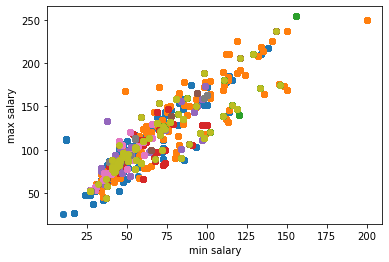

In [108]:
for i in selected_states:
    temp_df=df_filtered_states[df_filtered_states['states']==i]
    plt.scatter(temp_df['min salary'],temp_df['max salary'],)
    plt.xlabel("min salary")
    plt.ylabel("max salary")
    

In [116]:
min_sal_in_states=[]
max_sal_in_states=[]
for i in selected_states:
    temp_df=df_filtered_states[df_filtered_states['states']==i]
    a=temp_df['min salary'].mean()
    b=temp_df['max salary'].mean()
    min_sal_in_states.append(a)
    max_sal_in_states.append(b)

for i in range(len(selected_states)):
    print("states \t min salary(K) \t max_salary")
    print(selected_states[i],round(min_sal_in_states[i],3),round(max_sal_in_states[i],3))

states 	 min salary(K) 	 max_salary
 TX 55.617 99.052
states 	 min salary(K) 	 max_salary
 CA 82.221 133.602
states 	 min salary(K) 	 max_salary
 NY 76.401 118.319
states 	 min salary(K) 	 max_salary
 IL 62.268 99.248
states 	 min salary(K) 	 max_salary
 AZ 57.361 100.878
states 	 min salary(K) 	 max_salary
 PA 61.299 107.436
states 	 min salary(K) 	 max_salary
 FL 45.492 85.827
states 	 min salary(K) 	 max_salary
 OH 60.901 111.142
states 	 min salary(K) 	 max_salary
 NJ 63.667 104.667


Text(0, 0.5, 'max salary')

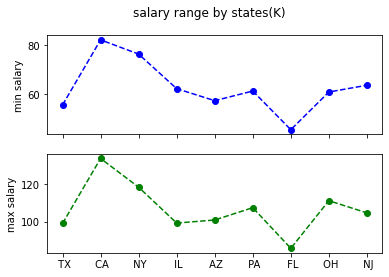

In [154]:
fig,ax=plt.subplots(2,sharex=True)
fig.suptitle("salary range by states(K)")
ax[0].plot(selected_states,min_sal_in_states,'bo--')
ax[1].plot(selected_states,max_sal_in_states,'go--')
ax[0].set_ylabel("min salary")
ax[1].set_ylabel("max salary")

In [130]:
myDict={}
myDict['DS_min']=[]
myDict['DS_max']=[]
myDict['BA_min']=[]
myDict['BA_max']=[]
myDict['DA_min']=[]
myDict['DA_max']=[]
for i in ['DS','BA','DA']:
    temp_df=df_filtered_states[df_filtered_states['role']==i]
    for j in selected_states:
        temp_df2=temp_df[temp_df['states']==j]
        a=temp_df2['min salary'].mean()
        b=temp_df2['max salary'].mean()
        myDict[i+'_min'].append(a)
        myDict[i+'_max'].append(b)

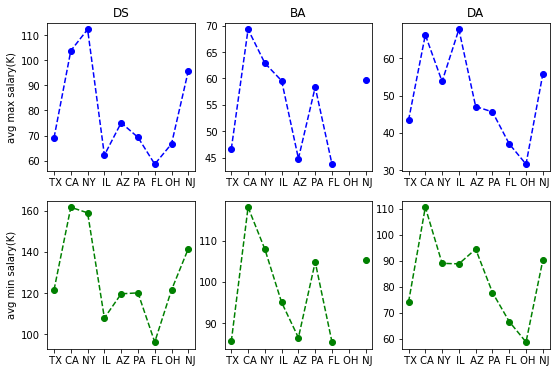

In [155]:
fig,axs=plt.subplots(2,3,figsize=(9,6))
axs[0,0].plot(selected_states,myDict['DS_min'],'bo--')
axs[0,0].set_title("DS")
axs[0,0].set_ylabel('avg max salary(K)')
axs[1,0].plot(selected_states,myDict['DS_max'],'go--')
axs[1,0].set_ylabel('avg min salary(K)')

axs[0,1].plot(selected_states,myDict['BA_min'],'bo--')
axs[0,1].set_title("BA")
axs[1,1].plot(selected_states,myDict['BA_max'],'go--')

axs[0,2].plot(selected_states,myDict['DA_min'],'bo--')
axs[0,2].set_title("DA")
axs[1,2].plot(selected_states,myDict['DA_max'],'go--')


In [157]:
for key,val in myDict.items():
    print(key,val)

DS_min [69.14604948124502, 103.81945743685688, 112.31629392971246, 62.21212121212121, 75.10508474576271, 69.29938271604938, 58.608695652173914, 66.69491525423729, 95.78125]
DS_max [121.54828411811653, 161.7464920486436, 159.03833865814696, 107.7961432506887, 119.59322033898304, 120.05246913580247, 96.08695652173913, 121.49152542372882, 141.59375]
BA_min [46.655834564254064, 69.28472906403941, 62.898039215686275, 59.56707317073171, 44.86135693215339, 58.36727272727273, 43.8, nan, 59.752808988764045]
BA_max [85.48966026587888, 118.17536945812807, 107.96862745098039, 94.9969512195122, 86.4188790560472, 104.84727272727272, 85.35, nan, 105.33707865168539]
DA_min [43.38578680203046, 66.31150159744409, 53.79710144927536, 67.79268292682927, 47.08247422680412, 45.63157894736842, 37.03703703703704, 31.6, 55.76744186046512]
DA_max [74.11675126903553, 110.55271565495208, 89.02608695652174, 88.82926829268293, 94.49484536082474, 77.82456140350877, 66.66666666666667, 58.8, 90.23255813953489]


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,role,min salary,max salary,role color,states
